In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 KB 2.5 MB/s eta 0:00:0000:0100:01


# 0. Imports

In [2]:
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


Matplotlib is building the font cache; this may take a moment.


# 1. Carregar o dataset de treino

In [3]:
df = pd.read_csv('./csv/treino/clientes.csv')

In [4]:
df.head()

,Nome,Data de Nascimento,Sexo,Profissão,Data de Início no Último Emprego,Empregado,Salário Atual,Estado Civil,Número de Filhos,Score de Crédito
0,Kevin Wood,1989-09-20,Feminino,"Conservator, museum/gallery",2017-08-12,True,10727.15,Casado,1,717
1,James Maynard,1969-03-06,Feminino,Medical illustrator,2024-08-09,True,5993.71,Casado,5,663
2,Jonathan Taylor,2001-09-02,Masculino,"Editor, magazine features",2024-09-19,True,8059.38,Casado,0,477
3,Daniel Crawford,1974-09-12,Masculino,Clinical psychologist,2015-05-17,True,10728.06,Casado,3,601
4,Brittany White,1971-10-20,Masculino,"Therapist, horticultural",NaN,False,0.00,Casado,0,606


# 2. Pré-processamento dos dados

In [5]:
label_encoders = {}
for column in ['Sexo', 'Profissão', 'Estado Civil']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Preenchendo valores ausentes
df.fillna({'Data de Início no Último Emprego': pd.to_datetime('2000-01-01')}, inplace=True)
df['Data de Início no Último Emprego'] = pd.to_datetime(df['Data de Início no Último Emprego'])
df['Anos no Emprego'] = (pd.to_datetime('today') - df['Data de Início no Último Emprego']).dt.days // 365
df

,Nome,Data de Nascimento,Sexo,Profissão,Data de Início no Último Emprego,Empregado,Salário Atual,Estado Civil,Número de Filhos,Score de Crédito,Anos no Emprego
0,Kevin Wood,1989-09-20,0,34,2017-08-12,True,10727.15,0,1,717,7
1,James Maynard,1969-03-06,0,88,2024-08-09,True,5993.71,0,5,663,0
2,Jonathan Taylor,2001-09-02,1,47,2024-09-19,True,8059.38,0,0,477,0
3,Daniel Crawford,1974-09-12,1,31,2015-05-17,True,10728.06,0,3,601,10
4,Brittany White,1971-10-20,1,155,2000-01-01,False,0.00,0,0,606,25
5,Laura Gonzales,1982-12-07,0,78,2023-03-31,True,1278.26,1,5,692,2
6,Christopher Henry,1965-04-25,0,16,2017-11-23,True,6789.52,2,3,650,7
7,Carla King,1969-07-09,1,167,2000-01-01,False,0.00,2,4,649,25
8,Christina Hayes,1979-05-01,0,85,2000-01-01,False,0.00,3,3,472,25
9,Matthew Cameron,1961-12-09,0,143,2017-09-27,True,13034.68,3,0,732,7


# 3. Adicionar idade e risco baseado em condições

In [6]:
df['Data de Nascimento'] = pd.to_datetime(df['Data de Nascimento'])
df['Idade'] = (datetime.now() - df['Data de Nascimento']).dt.days // 365

# Definindo o risco com base na idade e outras condições
def calculate_risk(row):
    risk = 0
    # Condições de risco baseadas na idade
    if 18 <= row['Idade'] <= 24:
        risk += 1  # Risco médio
    elif 25 <= row['Idade'] <= 49:
        risk -= 1  # Risco baixo
    else:
        risk += 1  # Risco médio

    # Adicionando risco se o campo "Data de Início no Último Emprego" for nulo
    if row['Data de Início no Último Emprego'] == pd.to_datetime('2000-01-01'):
        risk += 4  # Aumenta o risco em 80%

    # Adicionando risco baseado no sexo
    if row['Sexo'] == 1:  # Assume que 1 é masculino
        risk += 0.05  # Aumenta 5% para homens

    return risk

df['Risco'] = df.apply(calculate_risk, axis=1)

# Somar o risco ao score de crédito
df['Score Ajustado'] = 500 + (df['Risco'] * 50)  # Inicializa com um score base de 500
df['Score Ajustado'] = df['Score Ajustado'].clip(lower=0, upper=850)

df

,Nome,Data de Nascimento,Sexo,Profissão,Data de Início no Último Emprego,Empregado,Salário Atual,Estado Civil,Número de Filhos,Score de Crédito,Anos no Emprego,Idade,Risco,Score Ajustado
0,Kevin Wood,1989-09-20,0,34,2017-08-12,True,10727.15,0,1,717,7,35,-1.00,450.0
1,James Maynard,1969-03-06,0,88,2024-08-09,True,5993.71,0,5,663,0,56,1.00,550.0
2,Jonathan Taylor,2001-09-02,1,47,2024-09-19,True,8059.38,0,0,477,0,23,1.05,552.5
3,Daniel Crawford,1974-09-12,1,31,2015-05-17,True,10728.06,0,3,601,10,50,1.05,552.5
4,Brittany White,1971-10-20,1,155,2000-01-01,False,0.00,0,0,606,25,53,5.05,752.5
5,Laura Gonzales,1982-12-07,0,78,2023-03-31,True,1278.26,1,5,692,2,42,-1.00,450.0
6,Christopher Henry,1965-04-25,0,16,2017-11-23,True,6789.52,2,3,650,7,60,1.00,550.0
7,Carla King,1969-07-09,1,167,2000-01-01,False,0.00,2,4,649,25,55,5.05,752.5
8,Christina Hayes,1979-05-01,0,85,2000-01-01,False,0.00,3,3,472,25,46,3.00,650.0
9,Matthew Cameron,1961-12-09,0,143,2017-09-27,True,13034.68,3,0,732,7,63,1.00,550.0


# 4. Transformando o score ajustado em classes

In [7]:
def categorize_score(score):
    if score >= 600:
        return 1  # Bom Pagador
    elif 400 <= score < 600:
        return 0  # Pagador Médio
    else:
        return -1  # Mal Pagador

# Aplicando a categorização
df['Classificacao'] = df['Score Ajustado'].apply(categorize_score)

# Separar em variáveis de entrada e variável alvo
X = df.drop(columns=['Score Ajustado', 'Classificacao', 'Nome', 'Data de Nascimento', 'Data de Início no Último Emprego'])
y = df['Classificacao']

df

,Nome,Data de Nascimento,Sexo,Profissão,Data de Início no Último Emprego,Empregado,Salário Atual,Estado Civil,Número de Filhos,Score de Crédito,Anos no Emprego,Idade,Risco,Score Ajustado,Classificacao
0,Kevin Wood,1989-09-20,0,34,2017-08-12,True,10727.15,0,1,717,7,35,-1.00,450.0,0
1,James Maynard,1969-03-06,0,88,2024-08-09,True,5993.71,0,5,663,0,56,1.00,550.0,0
2,Jonathan Taylor,2001-09-02,1,47,2024-09-19,True,8059.38,0,0,477,0,23,1.05,552.5,0
3,Daniel Crawford,1974-09-12,1,31,2015-05-17,True,10728.06,0,3,601,10,50,1.05,552.5,0
4,Brittany White,1971-10-20,1,155,2000-01-01,False,0.00,0,0,606,25,53,5.05,752.5,1
5,Laura Gonzales,1982-12-07,0,78,2023-03-31,True,1278.26,1,5,692,2,42,-1.00,450.0,0
6,Christopher Henry,1965-04-25,0,16,2017-11-23,True,6789.52,2,3,650,7,60,1.00,550.0,0
7,Carla King,1969-07-09,1,167,2000-01-01,False,0.00,2,4,649,25,55,5.05,752.5,1
8,Christina Hayes,1979-05-01,0,85,2000-01-01,False,0.00,3,3,472,25,46,3.00,650.0,1
9,Matthew Cameron,1961-12-09,0,143,2017-09-27,True,13034.68,3,0,732,7,63,1.00,550.0,0


In [8]:
# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 5. Treinamento e Teste com KNN

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 6. Treinamento e Teste com Árvore de Decisão

In [10]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [11]:
# 7. Comparando os modelos
print("Resultados do KNN:")
print(classification_report(y_test, y_pred_knn))

print("Resultados da Árvore de Decisão:")
print(classification_report(y_test, y_pred_tree))


Resultados do KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        25

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Resultados da Árvore de Decisão:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        25

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



# Visualizações (Boxplot, K-Means e DBSCAN)

# 8. Boxplot para detectar outliers

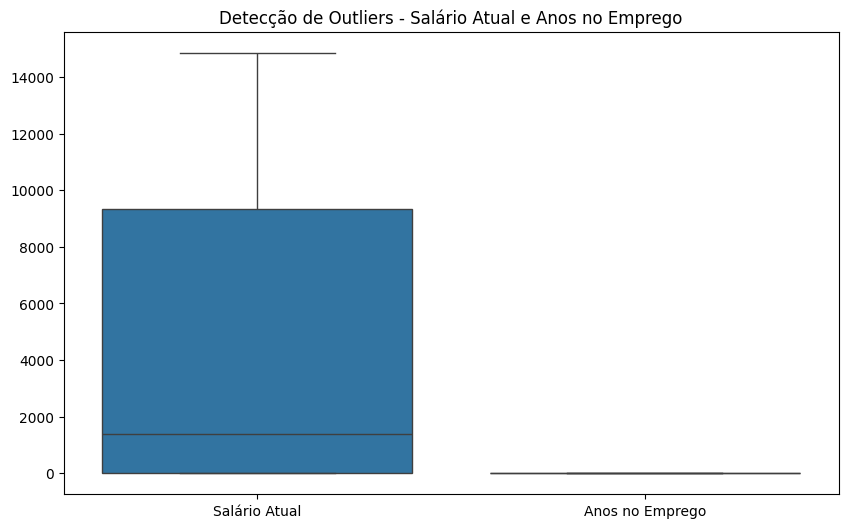

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Salário Atual', 'Anos no Emprego']])
plt.title("Detecção de Outliers - Salário Atual e Anos no Emprego")
plt.show()

# 9. K-Means para visualizar clusters de clientes

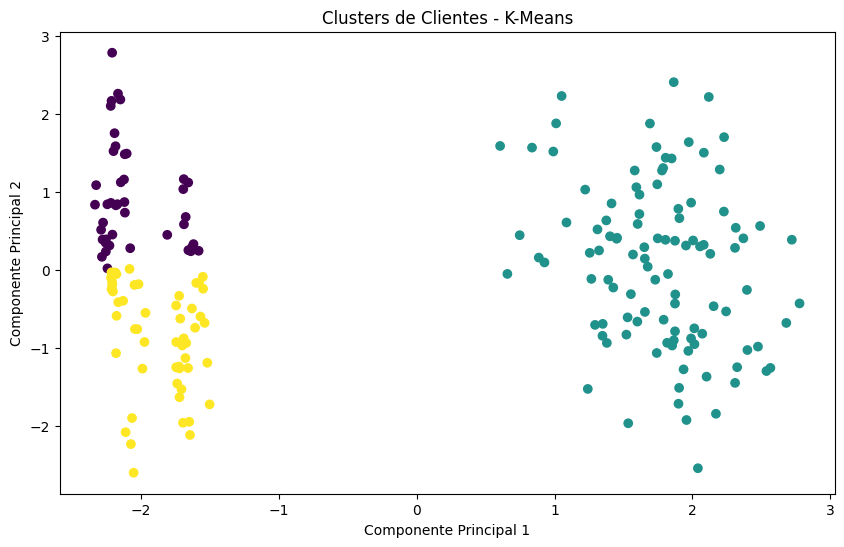

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clustering com K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Clusters de Clientes - K-Means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# 10. DBSCAN para visualização de quadrantes

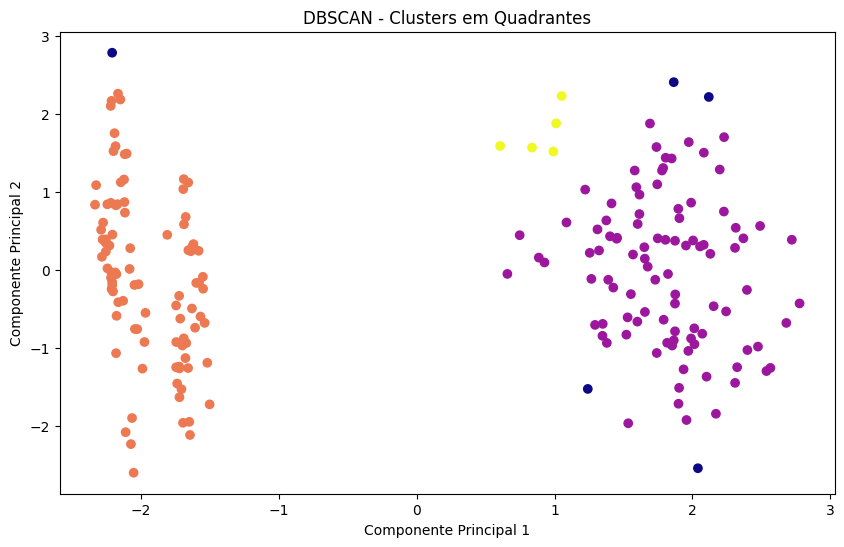

In [14]:

dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_clusters, cmap='plasma')
plt.title("DBSCAN - Clusters em Quadrantes")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# Testar um novo dataset

In [15]:

df_teste = pd.read_csv('./csv/teste/clientes_testes.csv')

In [16]:
df_teste.head()

,Nome,Data de Nascimento,Sexo,Profissão,Data de Início no Último Emprego,Salário Atual,Estado Civil,Número de Filhos,Empregado,Score de Crédito
0,Cliente_0,1996-10-17,Feminino,Médico,NaN,7153,Divorciado,2,0,434
1,Cliente_1,2004-07-16,Feminino,Programador,2021-06-30,9398,Divorciado,1,0,631
2,Cliente_2,1982-02-09,Feminino,Vendedor,NaN,1608,Casado,3,0,355
3,Cliente_3,1984-10-24,Feminino,Programador,2021-07-14,3776,Divorciado,3,1,611
4,Cliente_4,1986-10-04,Masculino,Engenheiro,2019-08-23,5268,Divorciado,1,0,768


# Pré-processamento do novo dataset

In [17]:
df_teste['Data de Nascimento'] = pd.to_datetime(df_teste['Data de Nascimento'])
df_teste['Data de Início no Último Emprego'] = pd.to_datetime(df_teste['Data de Início no Último Emprego'], errors='coerce')
df_teste.fillna({'Data de Início no Último Emprego': pd.to_datetime('2000-01-01')}, inplace=True)
df_teste['Idade'] = (datetime.now() - df_teste['Data de Nascimento']).dt.days // 365
df_teste['Anos no Emprego'] = (pd.to_datetime('today') - df_teste['Data de Início no Último Emprego']).dt.days // 365
df_teste['Risco'] = df_teste.apply(calculate_risk, axis=1)
df_teste['Score Ajustado'] = df_teste['Score de Crédito'] + (df_teste['Risco'] * 50)
df_teste['Score Ajustado'] = df_teste['Score Ajustado'].clip(lower=0, upper=850)
df_teste['Classificacao'] = df_teste['Score Ajustado'].apply(categorize_score)


In [18]:
# Preprocessando os dados do novo dataset
X_teste = df_teste[['Sexo', 'Profissão', 'Salário Atual', 'Estado Civil', 'Número de Filhos', 'Empregado', 'Idade', 'Anos no Emprego']]
X_teste = pd.get_dummies(X_teste, drop_first=True)  # One-hot encoding para variáveis categóricas

In [19]:
# Garantindo a mesma ordem das colunas do dataset de treino
X_teste = X_teste.reindex(columns=X.columns, fill_value=0)  # Preencher com 0 para colunas que não estão no teste

X_teste_scaled = scaler.transform(X_teste)  # Normalizando os dados do novo dataset


In [20]:
# Realizando previsões no novo dataset
predicoes_knn = knn.predict(X_teste_scaled)
predicoes_tree = tree.predict(X_teste_scaled)


In [21]:
# Adicionando as previsões ao DataFrame
df_teste['Predicao KNN'] = predicoes_knn
df_teste['Predicao Arvore'] = predicoes_tree

In [22]:
df_teste

,Nome,Data de Nascimento,Sexo,Profissão,Data de Início no Último Emprego,Salário Atual,Estado Civil,Número de Filhos,Empregado,Score de Crédito,Idade,Anos no Emprego,Risco,Score Ajustado,Classificacao,Predicao KNN,Predicao Arvore
0,Cliente_0,1996-10-17,Feminino,Médico,2000-01-01,7153,Divorciado,2,0,434,28,25,3,584,0,1,1
1,Cliente_1,2004-07-16,Feminino,Programador,2021-06-30,9398,Divorciado,1,0,631,20,3,1,681,1,0,1
2,Cliente_2,1982-02-09,Feminino,Vendedor,2000-01-01,1608,Casado,3,0,355,43,25,3,505,0,1,1
3,Cliente_3,1984-10-24,Feminino,Programador,2021-07-14,3776,Divorciado,3,1,611,40,3,-1,561,0,0,0
4,Cliente_4,1986-10-04,Masculino,Engenheiro,2019-08-23,5268,Divorciado,1,0,768,38,5,-1,718,1,0,1
5,Cliente_5,1994-04-07,Masculino,Médico,2016-02-09,56806,Solteiro,2,0,467,31,9,-1,417,0,0,1
6,Cliente_6,1997-08-03,Feminino,Vendedor,2018-08-10,4562,Divorciado,3,0,440,27,6,-1,390,-1,0,1
7,Cliente_7,1957-11-09,Masculino,Médico,2018-05-08,11363,Divorciado,3,1,752,67,7,1,802,1,0,0
8,Cliente_8,1998-12-26,Masculino,Vendedor,2016-01-30,3438,Solteiro,0,1,794,26,9,-1,744,1,0,0
9,Cliente_9,1968-12-06,Masculino,Professor,2020-08-28,8293,Solteiro,3,1,598,56,4,1,648,1,0,0


In [23]:
# Função para mapear as previsões para labels descritivos
def map_prediction(pred):
    if pred == 1:
        return "Bom Pagador"
    elif pred == 0:
        return "Pagador Médio"
    else:
        return "Mal Pagador"

In [24]:
# Imprimindo os resultados das previsões com labels descritivos
df_teste['Predicao KNN'] = df_teste['Predicao KNN'].apply(map_prediction)
df_teste['Predicao Arvore'] = df_teste['Predicao Arvore'].apply(map_prediction)

print("\nResultados das previsões:")
print(df_teste[['Nome', 'Predicao KNN', 'Predicao Arvore']])


Resultados das previsões:
            Nome   Predicao KNN Predicao Arvore
0      Cliente_0    Bom Pagador     Bom Pagador
1      Cliente_1  Pagador Médio     Bom Pagador
2      Cliente_2    Bom Pagador     Bom Pagador
3      Cliente_3  Pagador Médio   Pagador Médio
4      Cliente_4  Pagador Médio     Bom Pagador
5      Cliente_5  Pagador Médio     Bom Pagador
6      Cliente_6  Pagador Médio     Bom Pagador
7      Cliente_7  Pagador Médio   Pagador Médio
8      Cliente_8  Pagador Médio   Pagador Médio
9      Cliente_9  Pagador Médio   Pagador Médio
..           ...            ...             ...
990  Cliente_990  Pagador Médio   Pagador Médio
991  Cliente_991  Pagador Médio   Pagador Médio
992  Cliente_992  Pagador Médio   Pagador Médio
993  Cliente_993  Pagador Médio   Pagador Médio
994  Cliente_994  Pagador Médio     Bom Pagador
995  Cliente_995  Pagador Médio   Pagador Médio
996  Cliente_996  Pagador Médio   Pagador Médio
997  Cliente_997  Pagador Médio     Bom Pagador
998  Cliente_

# Exportando os resultados para um arquivo CSV

In [25]:
df_teste[['Nome', 'Sexo', 'Profissão', 'Salário Atual', 'Estado Civil', 'Predicao KNN', 'Predicao Arvore']].to_csv('resultados_previsao.csv', index=False)